## Testing Segment Anything

Download Model Weights

In [2]:
# !wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

Imports

In [3]:
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
from pathlib import Path

Load checkpoint and initialize model

In [4]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

CHECKPOINT_PATH='models/sam_vit_h_4b8939.pth'
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

Load random image

In [5]:
random_image = os.listdir('images')
random_image = random.choice(random_image)
image_name = random_image
random_image = f'images/{random_image}'

In [6]:
mask_predictor = SamPredictor(sam)

In [7]:
points = []

def click_event(event, x, y, flags, param):
    global points

    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        print("Point added: ({}, {})".format(x, y))
        cv2.circle(img, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow("Image", img)

# Load an image
img = cv2.imread(random_image)
cv2.imshow("Image", img)

# Set mouse callback function
cv2.setMouseCallback("Image", click_event)

while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # Escape key
        break

cv2.destroyAllWindows()

# Print collected points
print("Collected points:")
for point in points:
    print(point)

Point added: (662, 707)
Point added: (621, 720)
Point added: (588, 702)
Point added: (524, 684)
Point added: (499, 683)
Point added: (478, 650)
Point added: (432, 595)
Point added: (375, 566)
Point added: (347, 513)
Point added: (352, 408)
Point added: (382, 343)
Point added: (488, 291)
Point added: (539, 289)
Point added: (569, 322)
Point added: (630, 373)
Point added: (650, 391)
Point added: (672, 450)
Point added: (671, 498)
Point added: (678, 516)
Point added: (636, 536)
Point added: (624, 576)
Point added: (621, 631)
Point added: (638, 676)


KeyboardInterrupt: 

In [8]:
image = cv2.imread(random_image)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask_predictor.set_image(image_rgb)

input_points = np.array([p for p in points])
input_labels = np.array([1 for p in points])

# Predict mask with point prompt
masks, scores, logits = mask_predictor.predict(
    point_coords=input_points,
    point_labels=input_labels,
    multimask_output=False,
)

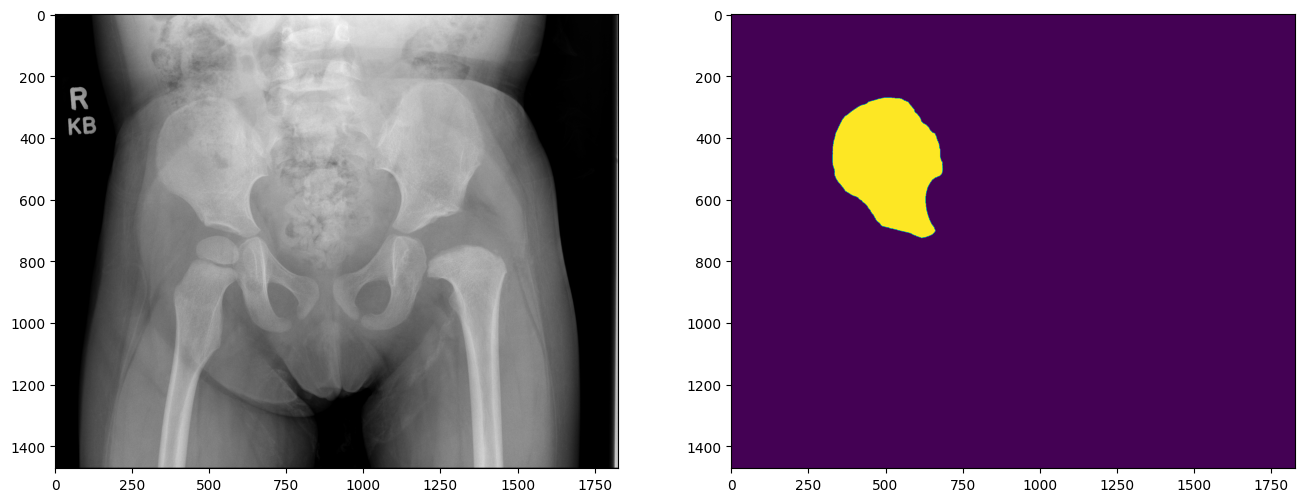

In [9]:
# Plot the bounding box prompt and predicted mask
_,axes = plt.subplots(1,2, figsize=(16,16))
axes[0].imshow(image_rgb)
axes[1].imshow(masks[0])

In [10]:
while True:
    user_input = input("Is the mask any good? Enter 'y' or 'n': ")
    if user_input.lower() == 'y':
        text_input = input("Enter name of file (no need to provide the extension): ")
        print("You entered:", text_input, f"Saving to labeled/{image_name.split(".png")[0]}/{text_input}.png")
        

        # Create a copy of the image
        result = img.copy()

        # Apply the mask to the image
        result[~masks[0]] = 0  # Set pixels outside the mask to zero

        output_dir = f"labeled/{image_name.split(".png")[0]}"
        Path(output_dir).mkdir(exist_ok=True, parents=True)
        out_image_path = f"{output_dir}/{text_input}.png"
        # Save the result as a PNG file
        cv2.imwrite(out_image_path, result)
        break
    elif user_input.lower() == 'n':
        print("You entered 'n'.")
        break
    else:
        print("Invalid input. Please enter 'y' or 'n'.")

You entered: 1 Saving to labeled/1557/1.png


In [11]:
# This thing totally works in most situations, there are issues though, for example, lets look at another segmentation result! Now let's 

In [ ]:
# Now lets test the algorithmic annotation, I have pregenerated masks for 1183, we'll use that.